https://blog.paperspace.com/autoencoder-image-compression-keras/

In [1]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot

In [2]:
# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 300)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 2)                 602       
                                                                 
 encoder_output (LeakyReLU)  (None, 2)                 0         
                                                                 
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_______________________________________________

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0587 - val_loss: 0.0542
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0534 - val_loss: 0.0525
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0517 - val_loss: 0.0503
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0496 - val_loss: 0.0486
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0482 - val_loss: 0.0477
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0473 - val_loss: 0.0468
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0466 - val_loss: 0.0464
Epoch 8/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0462 - val_loss: 0.0458
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0458 - val_loss: 0.0456
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0454 - val_loss: 0.0452

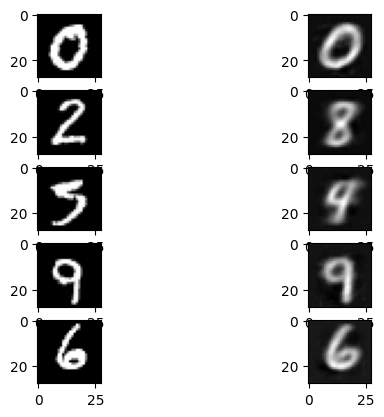

In [4]:
class Autoencoder:
    def __init__(self):
        # Encoder
        x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

        encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
        encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

        encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
        encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

        encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
        encoder.summary()

        # Decoder
        decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

        decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
        decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

        decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
        decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

        decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
        decoder.summary()

        # Autoencoder
        ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
        ae_encoder_output = encoder(ae_input)
        ae_decoder_output = decoder(ae_encoder_output)

        self.ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
        self.ae.summary()

        # AE Compilation
        self.ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

# matplotlib.pyplot.figure()
# matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
# matplotlib.pyplot.colorbar()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 300)               235500    
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 300)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 10)                3010      
                                                                 
 encoder_output (LeakyReLU)  (None, 10)                0         
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_______________________________________________

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.0376 - val_loss: 0.0278
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0260 - val_loss: 0.0242
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0237 - val_loss: 0.0228
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0226 - val_loss: 0.0219
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0218 - val_loss: 0.0213
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0212 - val_loss: 0.0207
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0208 - val_loss: 0.0204
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0204 - val_loss: 0.0201
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0201 - val_loss: 0.0198
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0198 - val_loss: 0.019

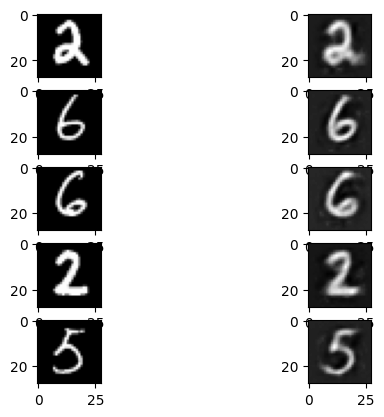

In [8]:
encoding_size = 10

# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=encoding_size, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

# matplotlib.pyplot.figure()
# matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
# matplotlib.pyplot.colorbar()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 784)]             0         
                                                                 
 encoder_dense_1 (Dense)     (None, 784)               615440    
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 784)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 784)               615440    
                                                                 
 encoder_output (LeakyReLU)  (None, 784)               0         
                                                                 
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
___________________________________________

Epoch 1/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0114 - val_loss: 0.0042
Epoch 2/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 3/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 4/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 5/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 7/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 8/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/20
235/235 [==============================] - 7s 31ms/step - loss: 0.0012 - val_lo

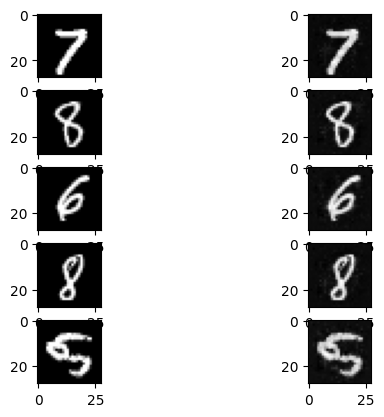

In [7]:
encoding_size = 784
hidden_size = 784

# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=encoding_size, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

# matplotlib.pyplot.figure()
# matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
# matplotlib.pyplot.colorbar()

In [82]:
encoding_size = 16
hidden_size = 784

# Encoder
x = tensorflow.keras.layers.Input(shape=(encoding_size), name="encoder_input")

# encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="encoder_dense_1")(x)
# encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

# encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=encoding_size, name="encoder_dense_2")(encoder_activ_layer1)
# encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, x, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005))

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 16)]              0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 16)]              0         
                                                                 
 decoder_dense_1 (Dense)     (None, 784)               13328     
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 784)              0         
 eLU)                                                            
                                    

In [90]:
test_size = 20

In [91]:
y_train_bin = numpy.zeros(shape = (y_train.shape[0], encoding_size))
for label_idx, label in enumerate(y_train):
    temp_bin = [int(x) for x in bin(label_idx)[2:]]
    temp_bin = [0 for _ in range(encoding_size - len(temp_bin))] + temp_bin
    for digit_idx, digit in enumerate(y_train_bin[label_idx]):
        y_train_bin[label_idx][digit_idx] = temp_bin[digit_idx]
y_train_bin = y_train_bin[:test_size]

In [60]:
y_test_bin = numpy.zeros(shape = (y_test.shape[0], encoding_size))
for label_idx, label in enumerate(y_test):
    temp_bin = [int(x) for x in bin(label_idx)[2:]]
    temp_bin = [0 for _ in range(encoding_size - len(temp_bin))] + temp_bin
    for digit_idx, digit in enumerate(y_test_bin[label_idx]):
        y_test_bin[label_idx][digit_idx] = temp_bin[digit_idx]

In [92]:
x_train_reduced = x_train[:test_size]

In [93]:
# Training AE
ae.fit(y_train_bin, x_train_reduced, epochs=1000, batch_size=10, shuffle=True, validation_data=(y_train_bin, x_train_reduced))

Epoch 1/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0534 - val_loss: 0.0471
Epoch 2/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0456 - val_loss: 0.0411
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0410 - val_loss: 0.0375
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0378 - val_loss: 0.0356
Epoch 5/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0356 - val_loss: 0.0341
Epoch 6/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0347 - val_loss: 0.0326
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0325 - val_loss: 0.0311
Epoch 8/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0310 - val_loss: 0.0297
Epoch 9/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0300 - val_loss: 0.0287
Epoch 10/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.0288 - val_loss: 0.0278
Epoch 11/

1/1 [==============================] - 0s 15ms/step


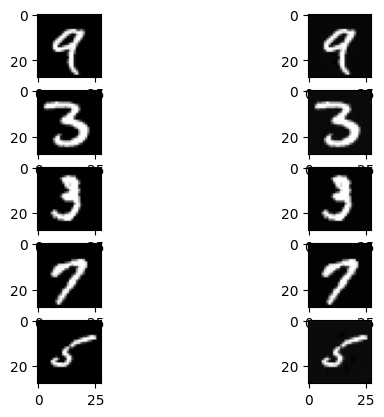

In [95]:
encoded_images = encoder.predict(y_train_bin)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))
x_train_reduced = numpy.reshape(x_train_reduced, newshape=(x_train_reduced.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train_reduced.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_reduced[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

1/1 [==============================] - 0s 16ms/step


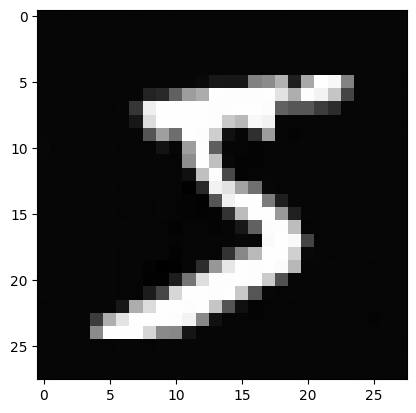

In [101]:
encoded_images = encoder.predict(y_train_bin[0:2])
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

matplotlib.pyplot.subplot(1, 1, 1)
matplotlib.pyplot.imshow(decoded_images_orig[0, :, :], cmap="gray")